<a href="https://colab.research.google.com/github/luis-arcas/biysc_cr/blob/main/Copia_de_niceplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Only nice plots allowed**

---



In [ ]:
print("Hello world")

### REMEMBER TO RUN EACH MODULE SEPARATELY AS VARIABLES SHARE NAMES (GOOD CODING STRATEGY)

Hello world


First of all, install/import all the packages needed.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openpyxl
!pip install --upgrade uncertainties
from uncertainties import ufloat
from uncertainties import unumpy
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as stm
print("success")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 4.0 MB/s eta 0:00:00
success


In [ ]:

#data_dict= {"Time": [i for i in range(1,5)],
#            "Detector 1": [int(input()) for i in range(0,10)],
#            "Detector 2": [int(input()) for i in range(0,10)],
#            "Detector 3": [int(input()) for i in range(0,10)],
#            "Detector 4": [int(input()) for i in range(0,10)]}

data_dict= {"D1": [3,2,1,5,3],
            "D2": [1,1,1,2,1],
            "D3": [1,3,2,1,1]}

df_frequencies = pd.DataFrame(data_dict)


In [ ]:
print(df_frequencies.head())

   D1  D2  D3
0   3   1   1
1   2   1   3
2   1   1   2
3   5   2   1
4   3   1   1


In [ ]:
exfile= pd.ExcelWriter('Muon counts.xlsx')
df_frequencies.to_excel(exfile)
exfile.save()
print("success")

success


In [ ]:
df_frequencies = df_frequencies.apply(np.cumsum)
print(df_frequencies.head())

   D1  D2  D3
0   3   1   1
1   5   2   4
2   6   3   6
3  11   5   7
4  14   6   8


In [ ]:
y_values = list(df_frequencies.loc[4])
print(y_values)

[14, 6, 8]


Text(0.5, 1.0, 'Total counts based on detector')

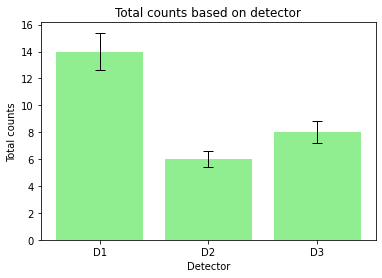

In [ ]:
fig = plt.figure()
plt.bar(("D1","D2","D3"), y_values, color='lightgreen')
plt.errorbar(["D1","D2","D3"], y_values , yerr = [1.4,0.6,0.8], fmt = ' ', color='black', ecolor='black', elinewidth=1, capsize=5)
plt.xlabel("Detector")
plt.ylabel("Total counts")
plt.title("Total counts based on detector")

EXPERIMENT 1 - Zenith Angle dependance

For this experiment, we want to check if there is a relation between the relative position between the sun and the detector. First of all, we create the input arrays

In [ ]:
def unc_calc(data_value):
  sys_unc = (((data_value.n*0.1)/15)**2+(((-data_value.n)/225)*1/60)**2)**0.5
  tot_unc = (sys_unc**2+data_value.s**2)**0.5
  return tot_unc

counts = [25,21,14,9,3,3,0]
poisson_std=[counts[i]**0.5 for i in range(0,7)]
unc_counts = unumpy.uarray(counts,poisson_std)
unc_counts_min = unc_counts/15
print(unc_counts)
print(unc_counts_min)

zen_dict = {"Zen angle":unumpy.uarray([0,15,30,45,60,75,90],[5 for i in range(0,7)]),
            "Counts": unumpy.uarray([unc_counts[i].n for i in range(0,7)],[unc_calc(unc_counts[i]) for i in range(0,7)]),
            "Counts/min": unumpy.uarray([unc_counts_min[i].n for i in range(0,7)],[unc_calc(unc_counts_min[i]) for i in range(0,7)])}

unc_sum_min = sum([zen_dict['Counts/min'][i].s for i in range(0,6)])
unc_sum = sum([zen_dict['Counts'][i].s for i in range(0,6)])
zero_unc = unc_sum/6
zero_unc_min = unc_sum_min/6
zen_dict['Counts/min'][6]=ufloat(zen_dict['Counts/min'][6].n,zero_unc_min)
zen_dict['Counts'][6]=ufloat(zen_dict['Counts'][6].n,zero_unc)

zen_df = pd.DataFrame(zen_dict)
print(zen_df)

[25.0+/-5.0 21.0+/-4.58257569495584 14.0+/-3.7416573867739413 9.0+/-3.0
 3.0+/-1.7320508075688772 3.0+/-1.7320508075688772 0.0+/-0]
[1.6666666666666667+/-0.3333333333333333 1.4+/-0.30550504633038933
 0.9333333333333333+/-0.2494438257849294 0.6+/-0.2
 0.2+/-0.11547005383792515 0.2+/-0.11547005383792515 0.0+/-0]
  Zen angle     Counts   Counts/min
0     0+/-5     25+/-5  1.67+/-0.33
1    15+/-5     21+/-5  1.40+/-0.31
2    30+/-5     14+/-4  0.93+/-0.25
3    45+/-5  9.0+/-3.0  0.60+/-0.20
4    60+/-5  3.0+/-1.7  0.20+/-0.12
5    75+/-5  3.0+/-1.7  0.20+/-0.12
6    90+/-5  0.0+/-3.3  0.00+/-0.22


Next, we plot the graph. For that, we just use #plt.figure and aesthetic commands.

-0.01936507936507937 1.585714285714286
[0.10330151 0.00191005] [ 1.58571429 -0.01936508]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     102.8
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           0.000160
Time:                        19:41:06   Log-Likelihood:                 4.4504
No. Observations:                   7   AIC:                            -4.901
Df Residuals:                       5   BIC:                            -5.009
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Text(0.5, 1.0, 'Relationship between zenith angle \nand detections per minute with a constant polar angle')

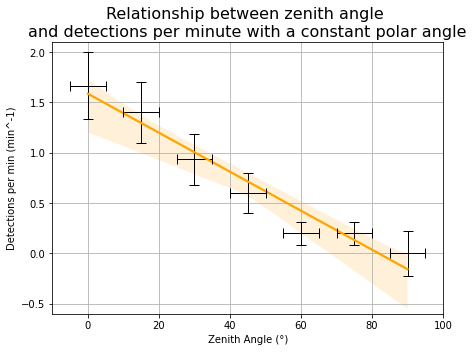

In [ ]:
fig_sun = plt.figure(figsize = (7,5))

x_nom, y_nom, x_err, y_err = [],[],[],[]

x= zen_df['Zen angle']
y= zen_df['Counts/min']
for val in x:
  x_nom.append(val.n)
  x_err.append(val.s)
for val in y:
  y_nom.append(val.n)
  y_err.append(val.s)

x_nom=np.array(x_nom)
y_nom=np.array(y_nom)


#linear regression
plt.plot(x_nom,y_nom,' ')
m,b = np.polyfit(x_nom,y_nom,1); print(m,b)
#plt.plot(x_nom,x_nom*m+b, color='green',linewidth=2.5)
sns.regplot(x_nom,y_nom, color='orange', marker=' ')
#obtention of regression parameters
x_fit = stm.add_constant(x_nom)
fit_results = stm.OLS(y_nom, x_fit).fit()
print(fit_results.bse, fit_results.params)
print(fit_results.summary())


plt.errorbar(x_nom, y_nom, xerr = x_err, yerr = y_err,  fmt = ' ', color='black', ecolor='black', elinewidth=1, capsize=5)
plt.xlabel('Zenith Angle (°)')
plt.ylabel('Detections per min (min^-1)')
plt.grid(True)
plt.axis([-10,100,-0.6,2.1])
plt.title('Relationship between zenith angle \nand detections per minute with a constant polar angle', fontsize=16)
#plt.figtext(0.93,0.5,"Assuming we have a \n10% uncertainty in \ncounting detections \nand a 5° uncertainty \nin angle measurement", color='#171821', fontsize=13)

EXPERIMENT 2 - Azimuthal Angle dependance

For this experiment, we want to check if there is a relation between the azimuthal angle and the reception of muons.

For this experiment, we first have to calculate the uncertainties associated with the different variables:


1.   Counts per minute (c): Let s(c) = 0.1c???
2.   Azimuthal angle (deg): Let s(°) = 2+1+1°, being 2° human error at placing the detector, and 1° for both solar compass and angle transporter resolution.
3.   Time (t): Let s(t) = 1 s = 1/60 min

Let's also assume a Poisson distribution* for the time taken in between counts (in this case, the counts in 15 minutes are the total events measured) (σ=(c)^0.5=s)


*A Poisson distribution studies the probability of time taken between two independent events of a kind.


In [ ]:
def unc_calc(data_value):
  sys_unc = (((data_value.n*0.1)/15)**2+(((-data_value.n)/225)*1/60)**2)**0.5
  tot_unc = (sys_unc**2+data_value.s**2)**0.5
  return tot_unc

counts = [10,13,11,10,12]
poisson_std=[counts[i]**0.5 for i in range(0,5)]
unc_counts = unumpy.uarray(counts,poisson_std)
unc_counts_min = unc_counts/15
print(unc_counts)
print(unc_counts_min)

sun_dict = {"Az angle":unumpy.uarray([0,45,90,135,180],[4 for i in range(0,5)]),
            "Counts":unumpy.uarray([unc_counts[i].n for i in range(0,5)], [unc_calc(unc_counts[i]) for i in range(0,5)]),
            "Counts/min": unumpy.uarray([unc_counts_min[i].n for i in range(0,5)],[unc_calc(unc_counts_min[i]) for i in range(0,5)])}

sun_df = pd.DataFrame(sun_dict)
sun_df.head()

[10.0+/-3.1622776601683795 13.0+/-3.605551275463989 11.0+/-3.3166247903554
 10.0+/-3.1622776601683795 12.0+/-3.4641016151377544]
[0.6666666666666666+/-0.21081851067789195
 0.8666666666666667+/-0.2403700850309326
 0.7333333333333333+/-0.22110831935702666
 0.6666666666666666+/-0.21081851067789195 0.8+/-0.2309401076758503]


,Az angle,Counts,Counts/min
0,0+/-4,10.0+/-3.2,0.67+/-0.21
1,45+/-4,13+/-4,0.87+/-0.24
2,90+/-4,11.0+/-3.3,0.73+/-0.22
3,135+/-4,10.0+/-3.2,0.67+/-0.21
4,180+/-4,12.0+/-3.5,0.80+/-0.23


In [ ]:
##TRIAL METHOD



#counts_min = [10/15,13/15,11/15,10/15,12/15]
#unc_counts = []
#for value in counts_min:
#  unc_perc = (0.1 + 1/(15*60))*value
#  unc_counts.append(unc)

#sun_dict = {"Az angle":unumpy.uarray([0,45,90,135,180],[2 for i in range(0,5)]),
#            "Counts/min": unumpy.uarray(counts_min,unc_counts)}

#sun_df = pd.DataFrame(sun_dict)
#sun_df.head()

0.00014814814814814744 0.733333333333333
[0.07717225 0.00070012] [7.33333333e-01 1.48148148e-04]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.314
Method:                 Least Squares   F-statistic:                   0.04478
Date:                Tue, 03 Jan 2023   Prob (F-statistic):              0.846
Time:                        19:47:19   Log-Likelihood:                 5.7139
No. Observations:                   5   AIC:                            -7.428
Df Residuals:                       3   BIC:                            -8.209
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Text(0.5, 1.0, 'Relationship between azimuth angle \nand detections per minute with a constant zenith angle')

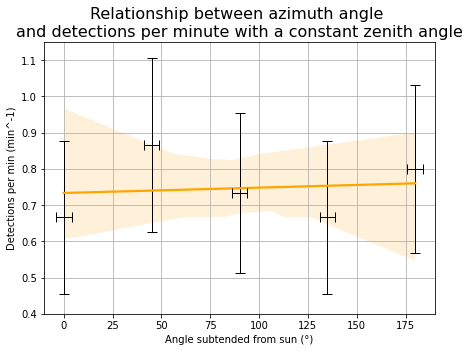

In [ ]:
fig_sun = plt.figure(figsize = (7,5))

x_nom, y_nom, x_err, y_err = [],[],[],[]

x= sun_df['Az angle']
y= sun_df['Counts/min']
for val in x:
  x_nom.append(val.n)
  x_err.append(val.s)
for val in y:
  y_nom.append(val.n)
  y_err.append(val.s)

x_nom=np.array(x_nom)
y_nom=np.array(y_nom)


#linear regression
plt.plot(x_nom,y_nom,' ')
m,b = np.polyfit(x_nom,y_nom,1); print(m,b)
#plt.plot(x_nom,x_nom*m+b, color='green',linewidth=2.5)
sns.regplot(x_nom,y_nom, color='orange', marker=' ')
#obtention of regression parameters
x_fit = stm.add_constant(x_nom)
fit_results = stm.OLS(y_nom, x_fit).fit()
print(fit_results.bse, fit_results.params)
print(fit_results.summary())

plt.errorbar(x_nom, y_nom, xerr = x_err, yerr = y_err,  fmt = ' ', color='black', ecolor='black', elinewidth=1, capsize=5)
plt.xlabel('Angle subtended from sun (°)')
plt.ylabel('Detections per min (min^-1)')
plt.grid(True)
plt.axis([-10,190,0.4,1.15])
plt.title('Relationship between azimuth angle \nand detections per minute with a constant zenith angle', fontsize=16)
#plt.figtext(0.93,0.5,"Assuming we have a \n10% uncertainty in \ncounting detections \nand a 4° uncertainty \nin angle measurement", color='#171821', fontsize=13)

In [ ]:
#EXPT 3 - MATERIAL BARRIER

In [ ]:

def unc_calc(data_value):
  sys_unc = (((data_value.n*0.1)/15)**2+(((-data_value.n)/225)*1/60)**2)**0.5
  tot_unc = (sys_unc**2+data_value.s**2)**0.5
  return tot_unc

cc=[25,14,13,16]
c1=[32,34,34,31]
ctot=[cc,c1]

ctot_uncs=[None,None]

for arr in ctot:
  poisson_std=[arr[i]**0.5 for i in range(0,4)]
  num=ctot.index(arr)
  ctot_uncs[num] = (unumpy.uarray(ctot[num],poisson_std))


bar_dict = {"Material":['None','Iron','Lead','Aluminium'],
            "C/c": ctot_uncs[0],
            "C/c-min": ctot_uncs[0]/15,
            "C/1": ctot_uncs[1],
            "C/1-min": ctot_uncs[1]/15}

count=0
for arr in ctot_uncs:
  plc_list=[]
  for val in arr:

    tot_unc= unc_calc(val)
    plc_list.append(ufloat(val.n,tot_unc))

  ctot_uncs[count]=plc_list
  count+=1

print(ctot_uncs)
print(bar_dict["C/1-min"])
print(bar_dict["C/c-min"])

bar_df = pd.DataFrame(bar_dict)
bar_df.head()



[[25.0+/-5.002777349346367, 14.0+/-3.7428214206073105, 13.0+/-3.6065928573112847, 16.0+/-4.001422144993165], [32.0+/-5.66087596841397, 34.0+/-5.835356383350833, 34.0+/-5.835356383350833, 31.0+/-5.571599086805133]]
[2.1333333333333333+/-0.37712361663282534
 2.2666666666666666+/-0.38873012632302006
 2.2666666666666666+/-0.38873012632302006
 2.066666666666667+/-0.3711842908553348]
[1.6666666666666667+/-0.3333333333333333
 0.9333333333333333+/-0.2494438257849294
 0.8666666666666667+/-0.2403700850309326
 1.0666666666666667+/-0.26666666666666666]


,Material,C/c,C/c-min,C/1,C/1-min
0,None,25+/-5,1.67+/-0.33,32+/-6,2.1+/-0.4
1,Iron,14+/-4,0.93+/-0.25,34+/-6,2.3+/-0.4
2,Lead,13+/-4,0.87+/-0.24,34+/-6,2.3+/-0.4
3,Aluminium,16+/-4,1.07+/-0.27,31+/-6,2.1+/-0.4


(-0.5, 3.5, 0.0, 70.0)

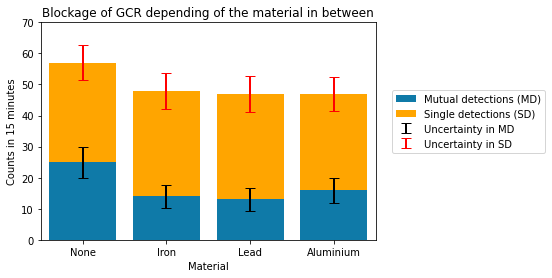

In [ ]:
bar_fig = plt.figure()

y1 = [val.n for val in bar_df['C/c']]
y2 = [val.n for val in bar_df['C/1']]

err1= [val.s for val in bar_df['C/c']]
err2= [val.s for val in bar_df['C/1']]

new_y = [y1[i]+y2[i] for i in range(0,4)]


plt.bar(bar_df['Material'], y1 ,color='#0f7aa8', width=0.8)
plt.bar(bar_df['Material'], y2 , bottom = y1 ,color='orange',width=0.8)
plt.errorbar(x=bar_df['Material'],
             y= y1,
             yerr= err1,
             color='black',
             fmt=' ',
             capsize=5,
             linewidth=2)
plt.errorbar(x=bar_df['Material'],
             y=new_y,
             yerr=err2,
             color='red',
             fmt=' ',
             capsize=5,
             linewidth=2)
plt.xlabel('Material')
plt.ylabel('Counts in 15 minutes')
plt.title('Blockage of GCR depending of the material in between')
plt.legend(['Mutual detections (MD)','Single detections (SD)','Uncertainty in MD','Uncertainty in SD'],loc=(1.05,0.4))
plt.axis([-0.5,3.5,0,70])